# Выявление закономерностей, определяющих коммерческую  успешность игры 

**Дано:** интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры.

Есть данные до 2016 года в таблице со столбцами:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Задача:** выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


**План исследования:**
 1. Обзор данных.
 2. Предобработка данных и расчеты.
 3. Исследовательский анализ данных.
 4. Портрет пользователя каждого региона.
 5. Проверка гипотез.
 6. Общий вывод.

## 1. Обзор данных

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
try:
    games = pd.read_csv('/Users/galina//Desktop/учёба/games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

In [3]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
games.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [6]:
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


## 2. Предобработка данных и расчеты

### Выводы по п.1. Обзор данных:

1. В  названиях столбцов - верблюжий стиль.
2. Есть пропуcки в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating`.
3. Есть нулевые значения в столбцах `NA_sales`,	`EU_sales`,	`JP_sales` и `Other_sales`.
4. Тип данных в столбцах `Year_of_Release`, `User_Score` необходимо поменять на int, float соответственно.

В целом даже если оставить только 8+ тысяч строк (по заполненному столбцу `Critic_Score`), то этого объёма достаточно для валидных выводов.

In [7]:
#заменяю заглавные буквы в названиях столбцов на строчные:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
#смотрю, сколько каких игр в таблице:
games['name'].value_counts()

Need for Speed: Most Wanted                12
FIFA 14                                     9
Ratatouille                                 9
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
                                           ..
Solitaire Overload Plus                     1
Pokémon Yellow: Special Pikachu Edition     1
Luminous Arc 2                              1
Silent Hunter III                           1
Superman: The New Superman Adventures       1
Name: name, Length: 11559, dtype: int64

In [9]:
#смотрю, сколько каких платформ в таблице:
games['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [10]:
#проверяю, есть ли дубликаты в жанрах:
games['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Неявных дубликатов в жанрах, названиях игр и платформах нет.

### 2.1. Пропуски

In [11]:
#смотрю пропуски в столбце 'name':
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
#смотрю игры, которые по году релиза и платформе совпадают с этими 2 неназванными играми:
games.query('platform == "GEN" and year_of_release == 1993')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
7885,Shining Force II,GEN,1993.0,Strategy,0.00,0.00,0.19,0.00,NaN,NaN,NaN
8893,Super Street Fighter II,GEN,1993.0,Fighting,0.00,0.00,0.15,0.00,NaN,NaN,NaN
11986,Ecco: The Tides of Time,GEN,1993.0,Adventure,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12098,Street Fighter II': Special Champion Edition (...,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12264,Streets of Rage 3,GEN,1993.0,Action,0.00,0.00,0.07,0.00,NaN,NaN,NaN
12984,Dynamite Headdy,GEN,1993.0,Platform,0.00,0.00,0.05,0.00,NaN,NaN,NaN
13343,Beyond Oasis,GEN,1993.0,Role-Playing,0.00,0.00,0.05,0.00,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Совпадений не нахожу, заполнить эти 2 пропуска нечем, их мало, без названия коммерческую успешность игры определить сложно, поэтому удалю их:

In [13]:
games = games.dropna(subset=['name'])
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Вместе с пропусками в названии игры удалила и пропуски в жанре.

In [14]:
#смотрю пропуски в столбце 'year_of_release':
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [15]:
#смотрю на примере первой строки, есть ли такие же игры, но с указанием года релиза
#(на самом деле больше просмотрела):
games.query('name == "Madden NFL 2004"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


Возможно, такая строка, где есть название, но нет года, не одна, поэтому циклом можно заполнить пропуски:

In [16]:
#по совпадению названия игр заполняю пропуски самым ранним годом релиза:
games['year_of_release'] = games['year_of_release'].fillna(games.groupby('name')['year_of_release'].transform('min'))

In [17]:
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [18]:
#снова смотрю пропуски в столбце 'year_of_release':
games[games['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Вместо 269 осталось 146 пропусков, которые можно либо удалить, либо заполнить нулями, либо оставить без изменений. Я оставляю без изменений:

In [20]:
#смотрю пропуски по названиям игр в столбце 'critic_score':
games[games['critic_score'].isna()]['name'].value_counts()

FIFA 12                                                               7
The Amazing Spider-Man 2 (2014)                                       7
Cars 2                                                                6
Transformers: Revenge of the Fallen (XBox 360, PS3, & PC Versions)    6
Lego Batman 3: Beyond Gotham                                          6
                                                                     ..
Jillian Michaels Fitness Ultimatum 2011                               1
Firefighter F.D.18                                                    1
Contender 2                                                           1
The Great Battle Gaiden 2: Matsuri da Wasshoi                         1
Superman: The New Superman Adventures                                 1
Name: name, Length: 7122, dtype: int64

In [21]:
#смотрю на примере первой строки, есть ли такие же игры, но с указанием critic_score
#(на самом деле больше просмотрела):
games.query('name == "FIFA 12"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
122,FIFA 12,PS3,2011.0,Sports,0.84,4.30,0.11,1.39,NaN,NaN,NaN
278,FIFA 12,X360,2011.0,Sports,0.84,2.78,0.02,0.53,NaN,NaN,NaN
2677,FIFA 12,Wii,2011.0,Sports,0.15,0.50,0.00,0.11,NaN,NaN,NaN
3843,FIFA 12,PSP,2011.0,Sports,0.12,0.25,0.02,0.13,NaN,NaN,NaN
4191,FIFA 12,PC,2011.0,Sports,0.04,0.33,0.00,0.10,NaN,NaN,NaN
4902,FIFA 12,3DS,2011.0,Sports,0.08,0.26,0.00,0.05,NaN,NaN,NaN
11237,FIFA 12,PS2,2011.0,Sports,0.00,0.02,0.00,0.06,NaN,NaN,NaN


In [22]:
#смотрю пропуски в столбце 'rating':
games[games['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [23]:
#смотрю, в одних и тех же строках пропуски в столбцах 'critic_score' и 'rating':
games[(games['critic_score'].isna() == True) & (games['rating'].isna() == True)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6681 entries, 1 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             6681 non-null   object 
 1   platform         6681 non-null   object 
 2   year_of_release  6617 non-null   float64
 3   genre            6681 non-null   object 
 4   na_sales         6681 non-null   float64
 5   eu_sales         6681 non-null   float64
 6   jp_sales         6681 non-null   float64
 7   other_sales      6681 non-null   float64
 8   critic_score     0 non-null      float64
 9   user_score       62 non-null     object 
 10  rating           0 non-null      object 
dtypes: float64(6), object(5)
memory usage: 626.3+ KB


Пропуски в столбцах `critic_score`, `rating` и частично `user_score` могли возникнуть из-за технической ошибки, человеческого фактора или просто потому, что данных нет - никак игры не критиковались и не рейтинговались.

Не вижу смысла заполнять пропуски , так как если их заполнить:
- нулями, то это автоматически понижает рейтинги игр, а рейтинг игры в реальности может быть высокими, следовательно, исказятся выводы по успешности игры
- медианой или средним, то это, наоборот, повысит рейтинг игры

Поэтому оставлю эти пропуски, как есть.

In [24]:
#смотрю столбец `user_score`:
games['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.3       2
0.5       2
0.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Есть 2424 строки, где вместо цифры указано tbd.
Нашла, что tbd - это либо to be discussed, либо to be determined, либо to be done. 
Видимо, это не ошибка, а специальное обозначение, чтобы потом пропуск заполнить. 
Однако сейчас значений нет, поэтому заменяю tbd на пропуск, так как на 0 или любое другое цифровое значение заменять странно - это автоматом будет обозначать рейтинг, которого фактически нет. 

In [25]:
#заменяю в столбце `user_score` tbd на пропуск:
games['user_score'] = games['user_score'].replace('tbd', np.nan, regex=True) 

In [26]:
#заполняю пропуски в столбце `rating` на 'No ESRB':
games['rating'] = games['rating'].fillna('No ESRB')
games.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,No ESRB
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,No ESRB
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,No ESRB
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,No ESRB
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,No ESRB


In [27]:
#смотрю, как изменилась таблица после манипуляций выше:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   object 
 10  rating           16713 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


Избавилась от пропусков везде, кроме `critic_score`, `user_score`, где от пропусков избаляться посчитала нелогичным.

### 2.2. Замена типов данных

In [28]:
#преобразую непустые данные в столбце year_of_release из float в int:
games['year_of_release'] = games[(games['year_of_release'].isna() == False)]['year_of_release'].astype('Int64')

In [29]:
#преобразую данные в столбце `user_score` из object во float:
games['user_score'] = games['user_score'].astype('float')

In [30]:
#проверяю, есть ли явные дубликаты и сколько:
games.duplicated().sum()

0

In [31]:
#проверяю, есть ли неявные дубликаты и сколько:
games[['name', 'platform']].duplicated().sum()

4

In [32]:
#вывожу посмотреть этот 1 неявный дубликат:
games[['name', 'platform']].value_counts()

name                               platform
Sonic the Hedgehog                 PS3         2
Need for Speed: Most Wanted        PC          2
                                   X360        2
Madden NFL 13                      PS3         2
 Beyblade Burst                    3DS         1
                                              ..
Halo: Combat Evolved Anniversary   X360        1
Halo: Reach                        X360        1
Halo: The Master Chief Collection  XOne        1
Hammerin' Hero                     PSP         1
¡Shin Chan Flipa en colores!       DS          1
Length: 16709, dtype: int64

In [33]:
#вывожу посмотреть неявные дубликаты со всеми данными:
games.query('name in ["Madden NFL 13", "Sonic the Hedgehog"]').sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
507,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.00,0.17,81.0,5.8,E
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
3986,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.00,0.03,NaN,7.3,E
5887,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.00,0.02,63.0,7.3,E
7066,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.00,0.02,75.0,6.7,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
257,Sonic the Hedgehog,GEN,1991,Platform,3.03,0.91,0.26,0.13,NaN,NaN,No ESRB
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
1996,Sonic the Hedgehog,X360,2006,Platform,0.44,0.48,0.00,0.11,46.0,4.4,E10+
4127,Sonic the Hedgehog,PS3,1991,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


In [34]:
games.loc[[604, 16230, 1745, 4127]]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
1745,Sonic the Hedgehog,PS3,2006,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,1991,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


In [35]:
#удаляю строку 16230:
games = games.drop(index=[16230])

#удаляю строку 4127:
games = games.drop(index=[4127])

In [36]:
#смотрю, как изменилась таблица после манипуляций выше:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16565 non-null  Int64  
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8135 non-null   float64
 9   user_score       7588 non-null   float64
 10  rating           16711 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


### 2.3. Расчеты

In [37]:
#считаю суммарные продажи во всех регионах в отдельный столбец:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales'] 

In [38]:
#смотрю, как изменилась таблица после манипуляций выше:
games.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,16565.000000,16711.000000,16711.000000,16711.000000,16711.000000,8135.000000,7588.000000,16711.000000
mean,2006.489164,0.263334,0.145033,0.077634,0.047348,68.969146,7.125659,0.533349
std,5.863863,0.813609,0.503381,0.308888,0.186752,13.936036,1.499686,1.548370
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000,0.470000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000,82.540000


In [39]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,No ESRB,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,No ESRB,31.38


### Результат по п.2. Предобработка данных и расчеты:

1. Были заменены названия столбцов, удалены неявные дубликаты.
2. Были обработаны пропуски, заменены типы данных на более удобные и добавлены столбцы для дальнейших расчетов.
3. Проведены расчеты суммарных продаж для каждой игры. 

## 3. Исследовательский анализ данных

### 3.1. Cколько игр выпускалось в разные годы. Важны ли данные за все периоды

In [40]:
#создаю сводную таблицу по годам:
games_annual = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
games_annual.columns = ['game_quantity']
games_annual.head()

,game_quantity
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14


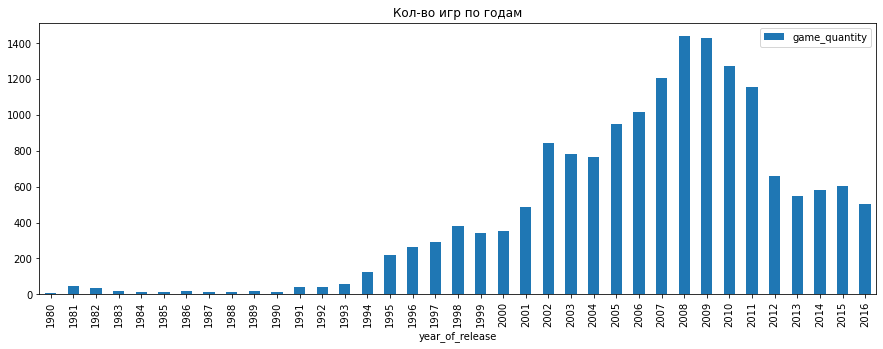

In [41]:
#строю график:
games_annual.plot.bar(figsize = (15,5))
plt.title('Кол-во игр по годам')
plt.show()

Промежуточные выводы:
- Количество игр росло с 1990, пик - 2008,
- Затем начинается спад, видимо, связанный с ростом популярности мобильных игр.

Соответственно, важны данные с 2000 года, когда кол-во игр начало резко расти.

### 3.2. Как менялись продажи по платформам. Платформы с наибольшими суммарными продажами и  распределение по годам. Характерный срок для появления новых и ухода старых платформ

In [42]:
#создаю сводную таблицу по продажам на платформах:
games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.16
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


In [43]:
#смотрю долю продаж первых 6 платформ:
games.query('platform in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]')['total_sales'].sum() / games['total_sales'].sum()

0.6295260748586302

Наиболее эффективные в части продаж 6 платформ - PS2, X360, PS3, Wii, DS и PS. Седьмая по продажам платформа дает объем в 2 раза меньший, чем шестая.

На PS2, X360, PS3, Wii, DS и PS приходится почти 63% всех продаж.
Поэтому посмотрим распределение по годам по этим 6 платформам.

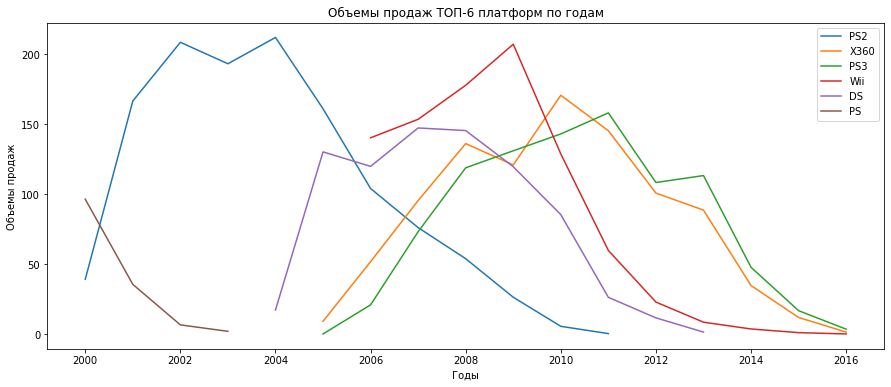

In [44]:
plt.figure(figsize=(15,6))
plt.title('Объемы продаж ТОП-6 платформ по годам')
plt.xlabel('Годы')
plt.ylabel('Объемы продаж')

for i in ["PS2", "X360", "PS3", "Wii", "DS", "PS"]:
    games_cut_plt = games[(games['platform'] == i) & (games['year_of_release'] >= 2000)][['year_of_release','total_sales']].pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values(by='year_of_release').reset_index()
    sns.lineplot(x=games_cut_plt['year_of_release'], y=games_cut_plt['total_sales'], data = games_cut_plt, label=i)

Промежуточные выводы:
- Платформы существуют и продают плюс-минус 10 лет. Максимальные продажи - на 3-5 год продаж
- Больше других "продали" 2 платформы - PS2 и X360. Аутсайдер - PS
- С 2009 у всех спад продаж

In [45]:
#смотрю платформы, чьи продажи не попали в период с 2014 по 2016:
platform_to_delete = games.pivot_table(index='platform', values='year_of_release', aggfunc = ['min','max'])
platform_to_delete.columns = ['start' , 'finish']
platform_to_delete.sort_values(by='finish')

,start,finish
platform,,
GG,1992,1992
2600,1980,1994
SCD,1993,1994
GEN,1990,1994
NES,1983,1994
3DO,1994,1995
TG16,1995,1995
PCFX,1996,1996
NG,1993,1996


In [46]:
#оставляю в исследовании только годы с 2014 и платформы, которые чьи продажи попадают в период с 2014:
games_2014_2016 = games.query('platform in ["PSP", "PS3", "PS4", "PSV", "PC", "3DS", "Wii", "WiiU", "X360", "XOne"] and year_of_release in [2014, 2015, 2016]')
games_2014_2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,No ESRB,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,No ESRB,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,No ESRB,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No ESRB,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,No ESRB,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,No ESRB,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,No ESRB,0.01


In [47]:
games_2014_2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   Int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 173.2+ KB


Таблица сократилась до 1689 строк.

### 3.3. «Ящик с усами» по продажам игр в разбивке по платформам

<AxesSubplot:title={'center':'Ящики с усами по ТОП-5 платформам'}, xlabel='platform', ylabel='total_sales'>

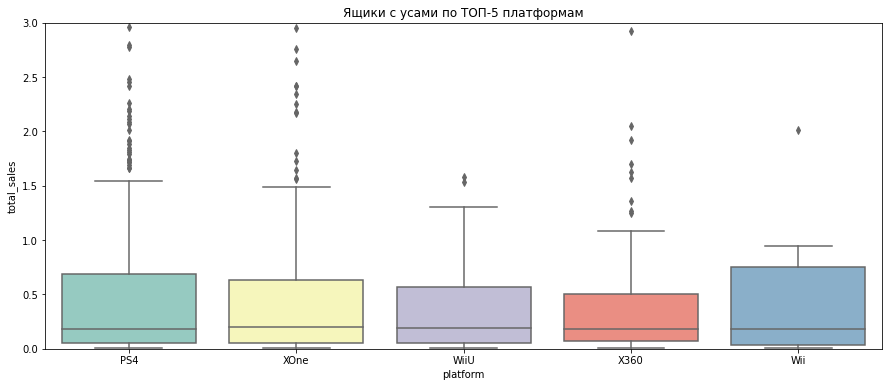

In [48]:
#создаю таблицу по 5 наиболее эффективным в части продаж платформам в период с 2014:
top5_platform = games_2014_2016.query('platform in ["PS4", "Wii", "WiiU", "X360", "XOne"]')[['platform', 'total_sales']]

#строю «ящик с усами» по продажам на ТОП-5 платформах:
plt.figure(figsize=(15,6))
plt.ylim(0,3)
plt.title('Ящики с усами по ТОП-5 платформам')
sns.boxplot(data=top5_platform, x='platform', y='total_sales', palette='Set3')

Промежуточный вывод:

Размах у ТОП-5 платформ разные, , медиана примерно на одном уровне, наиболее эффективные в части продаж в период с 2014 по 2016 - PS4 и Wii.

### 3.4. Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами

In [49]:
#создаю таблицу с продажами по платформе PS4 и отзывами пользователей и критиков:
PS4_sales_score = games_2014_2016.query('platform == "PS4"')[['total_sales','critic_score','user_score']]

#смотрю корреляцию между отзывами и продажами:
PS4_sales_score.corr()                

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


Text(0.5, 1.0, 'Влияние отзывов критиков на продажи платформы PS4')

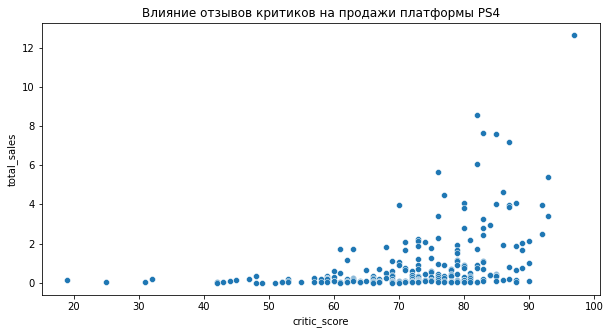

In [50]:
#строю диаграмму рассеяния между 'total_sales' и 'critic_score':
plt.figure(figsize=(10,5))
sns.scatterplot(x='critic_score', y='total_sales', data=PS4_sales_score)
plt.title('Влияние отзывов критиков на продажи платформы PS4')

Text(0.5, 1.0, 'Влияние отзывов пользователей на продажи платформы PS4')

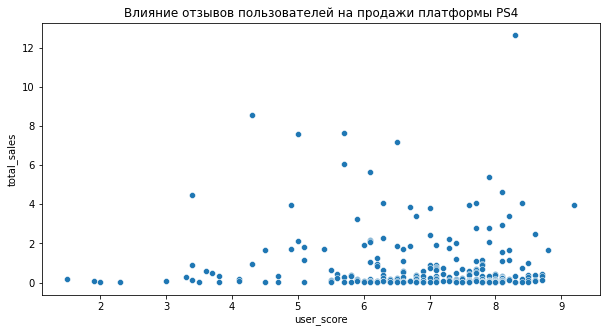

In [51]:
#строю диаграмму рассеяния между 'total_sales' и 'user_score':
plt.figure(figsize=(10,5))
sns.scatterplot(x='user_score', y='total_sales', data=PS4_sales_score)
plt.title('Влияние отзывов пользователей на продажи платформы PS4')

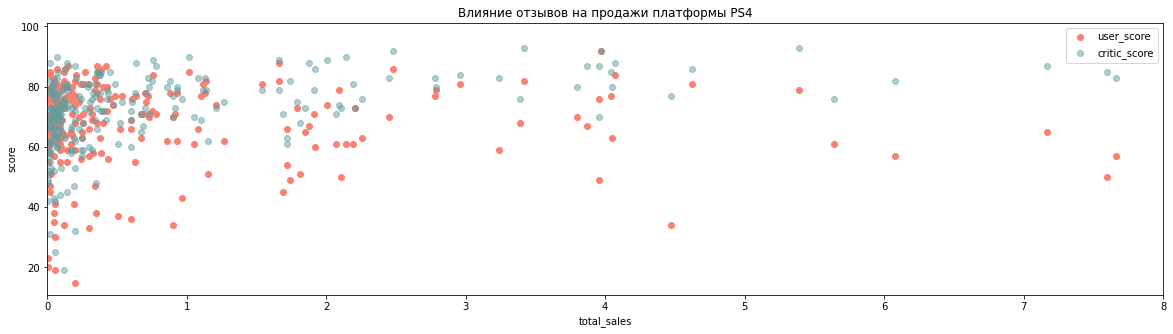

In [52]:
#можно еще посмотреть вот так, чтобы понять, какой параметр больше влияет на 'total_sales':
X = PS4_sales_score['total_sales']
Y1 = PS4_sales_score['user_score']
Y2 = PS4_sales_score['critic_score']
plt.figure(figsize=(20,5))
plt.plot(X, Y1*10, 'ro', color='salmon', label='user_score')
plt.plot(X, Y2, 'ro', color='cadetblue', alpha=0.5, label='critic_score')
plt.xlim(0,8)
plt.xlabel('total_sales')
plt.ylabel('score')
plt.title('Влияние отзывов на продажи платформы PS4')
plt.legend()
plt.show()

In [53]:
#для сравнения смотрю корреляцию между отзывами и продажами на платформах, которые не вошли в ТОП-5, за тот же период :
games_2014_2016.query('platform not in ["PS4", "Wii", "WiiU", "X360", "XOne"]')[['total_sales',
                                                                          'critic_score','user_score']].corr()    

,total_sales,critic_score,user_score
total_sales,1.000000,0.174104,-0.088870
critic_score,0.174104,1.000000,0.462516
user_score,-0.088870,0.462516,1.000000


Промежуточный вывод:
- Мнения критиков (`critic_score`) влияют на продажи, причем сильнее, чем мнение пользователей (`user_score`), но и не настолько, чтоб продажи зависели только от этого параметра. Более того, `user_score` влияет на продажи обратно пропорционально, то есть снижает их, но слабо.
- Если сравнивать PS4 с платформами, не вошедшими в ТОП-5 по продажам, то там картина похожая.

### 3.5. Общее распределение игр по жанрам. Самые прибыльные жанры. Жанры с высокими и низкими продажами

In [54]:
#создаю сводную таблицу по играм и жанрам:
games_genre = games_2014_2016.pivot_table(index='genre', values='name', aggfunc='count')
games_genre.columns = ['game_quantity']
games_genre = games_genre.sort_values(by='game_quantity', ascending=False)
games_genre

,game_quantity
genre,
Action,619
Role-Playing,221
Adventure,185
Sports,161
Shooter,128
Misc,113
Racing,69
Fighting,60
Simulation,44


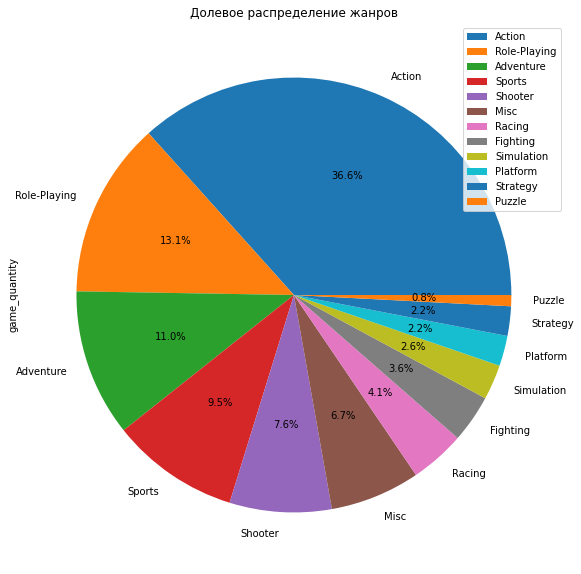

In [55]:
#строю график общего распределения игр по жанрам:
games_genre.plot.pie(y='game_quantity', figsize=(10,10), autopct='%1.1f%%')
plt.title('Долевое распределение жанров')
plt.legend(loc='upper right')
plt.show()

Промежуточный вывод:

ТОП-3 жанра по кол-ву игр в период с 2014 по 2016 - Action, Role-Playing и Adventure.

In [56]:
#создаю сводную таблицу по жанрам и продажам:
genre_sales = games_2014_2016.pivot_table(index='genre', values=['total_sales'], aggfunc=['sum', 'count', 'median', 'mean'])
genre_sales.columns = ['genre_sales', 'sales_quantity', 'median_sales', 'mean_sales']
genre_sales = genre_sales.sort_values(by='median_sales', ascending=False)
genre_sales

,genre_sales,sales_quantity,median_sales,mean_sales
genre,,,,
Shooter,170.94,128,0.515,1.335469
Sports,109.48,161,0.180,0.680000
Platform,18.09,38,0.140,0.476053
Fighting,28.22,60,0.125,0.470333
Role-Playing,101.44,221,0.110,0.459005
Simulation,13.13,44,0.100,0.298409
Action,199.36,619,0.090,0.322068
Misc,37.55,113,0.090,0.332301
Racing,27.52,69,0.090,0.398841


Промежуточный вывод:
- ТОП-3 жанра по кол-ву игр - Action, Role-Playing и Adventure. Теперь неудивительно, что именно в Action чаще всего делают игры, хотя скорее всего, это уже взаимозависимые параметры. Аутсайдеры - все те же Puzzle, Strategy
- Жанры с высокими медианными продажами - Shooter и Sports. Аутсайдеры - все те же Puzzle, Strategy
- Интересно, что несмотря на то, что в Platform мало игр, этот жанр дает хорошие медианные продажи.

### Результат по п.3. Исследовательский анализ данных:

1. Количество игр достигло пика в 2008, затем начался спад. С 2015 продажи стремятся к 0.
2. Пика продаж платформы достигают на 3-5 год. Лидеры продаж среди платформ в период с 2014 по 2016 - Wii и X360
3. Мнения критиков в несколько раз сильнее влияют на продажи, чем мнение пользователей, но и не настолько, чтоб продажи зависели только от их мнения.
4. ТОП-3 жанра по кол-ву игр в период с 2014 по 2016 - Action, Role-Playing и Adventure. ТОП-3 жанра по медианным продажам - Shooter и Sports.

## 4. Портрет пользователя каждого региона

### 4.1. Самые популярные платформы (топ-5) по регионам

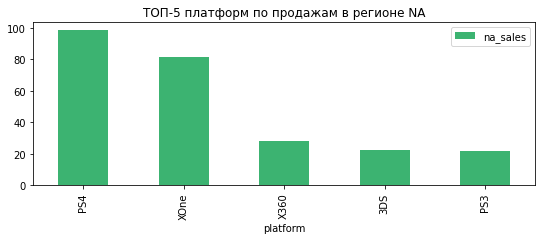

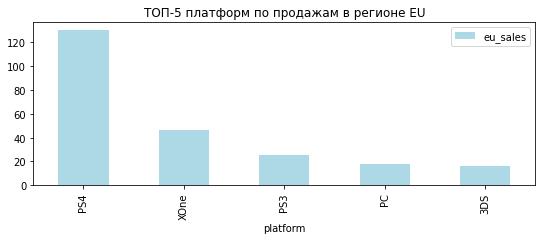

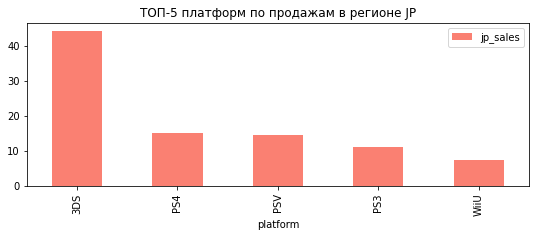

In [57]:
#определяю для пользователя каждого региона (NA, EU, JP) самые продающие платформы (топ-5):
games_2014_2016.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales',
                                                              ascending=False).head(5).plot.bar(figsize=(9,3), color='mediumseagreen')
plt.title('ТОП-5 платформ по продажам в регионе NA')
plt.show()

games_2014_2016.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales',
                                                              ascending=False).head(5).plot.bar(figsize=(9,3), color='lightblue')
plt.title('ТОП-5 платформ по продажам в регионе EU')
plt.show()

games_2014_2016.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales',
                                                              ascending=False).head(5).plot.bar(figsize=(9,3), color='salmon')
plt.title('ТОП-5 платформ по продажам в регионе JP')
plt.show()

Промежуточный вывод по периоду с 2014 по 2016:
- В регионе NA самая продающая платформа - PS4.
- В регионе EU самая продающая платформа - PS4.
- В регионе JP самые продающие платформы - 3DS.

### 4.2. Самые популярные жанры (топ-5) по регионам

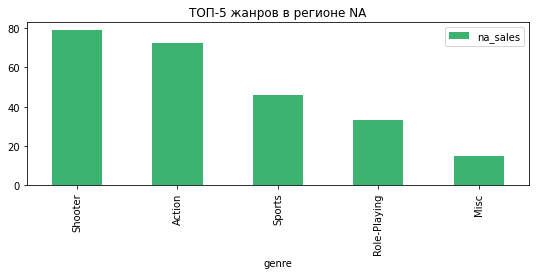

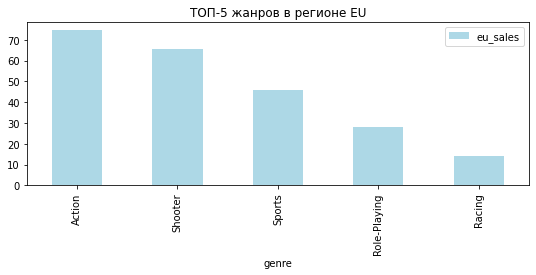

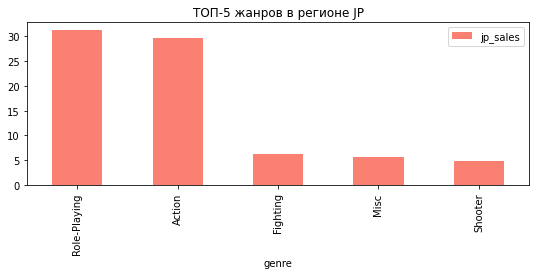

In [58]:
#определяю для пользователя каждого региона (NA, EU, JP) самые популярные жанры (топ-5):
games_2014_2016.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales',
                                                              ascending=False).head(5).plot.bar(figsize=(9,3),
                                                                                                color='mediumseagreen')
plt.title('ТОП-5 жанров в регионе NA')
plt.show()

games_2014_2016.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales',
                                                              ascending=False).head(5).plot.bar(figsize=(9,3),
                                                                                                color='lightblue')
plt.title('ТОП-5 жанров в регионе EU')
plt.show()

games_2014_2016.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales',
                                                              ascending=False).head(5).plot.bar(figsize=(9,3),
                                                                                                color='salmon')
plt.title('ТОП-5 жанров в регионе JP')
plt.show()

Промежуточный вывод по периоду с 2014 по 2016:
- Регионы NA и EU в части выбора жанров игр очень похожи - наиболее популярные жанры Action, Sports	и Shooter. 
- Интересно, что в отличие от NA и EU, у японцев первый по популярности жанр - Role-Playing. Видимо, это объясняется общей популярностью ролевых игр в регионе.

### 4.3. Влияние рейтинга ESRB на продажи в отдельном регионе

In [59]:
#смотрю зависимость между продажами в регионе NA и рейтингом ESRB:
games_2014_2016[['na_sales', 'rating']].pivot_table(index='rating',
                                          values='na_sales',
                                          aggfunc='sum').sort_values(by='na_sales', ascending=False)

,na_sales
rating,
M,96.42
No ESRB,64.72
E,50.74
T,38.95
E10+,33.23


In [60]:
#смотрю зависимость между продажами в регионе EU и рейтингом ESRB:
games_2014_2016[['eu_sales', 'rating']].pivot_table(index='rating',
                                          values='eu_sales',
                                          aggfunc='sum').sort_values(by='eu_sales', ascending=False)

,eu_sales
rating,
M,93.44
No ESRB,58.95
E,58.06
T,34.07
E10+,26.16


In [61]:
#смотрю зависимость между продажами в регионе JP и рейтингом ESRB:
games_2014_2016[['jp_sales', 'rating']].pivot_table(index='rating',
                                          values='jp_sales',
                                          aggfunc='sum').sort_values(by='jp_sales', ascending=False)

,jp_sales
rating,
No ESRB,56.90
T,14.78
E,8.94
M,8.01
E10+,4.46


Промежуточный вывод по периоду с 2014 по 2016:

С учетом категорий ESRB:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
(источник - https://www.esrb.org)
- и отсутствием какой-либо категории,

в регионах NA и EU больше всего продаж в категории М, E, T, то есть «Для взрослых», «Для всех», «Подросткам». Это если без учета категории "без категории".

Интересно, что в Японии больше всего продаж в категории "без категории", возможно, это специфика региона или опять-таки сбой при выгрузке. Если отбросить ее, то больше всего в этом регионе продается категория Т, то есть «Подросткам». Однако можно поискать локальный рейтинг типа https://www.cero.gr.jp

При этом понятно, что по объемам продаж регионы NA и EU больше, чем JP, просто из-за большего кол-ва людей.

### Результат по п.4. Портрет пользователя каждого региона
1. Портрет пользователя региона NA - купил игру жанра Action, Sports или Shooter в категории М на платформе PS4.
2. Портрет пользователя региона EU - купил игру жанра Action, Sports или Shooter в категории М на платформе PS4.
3. Портрет пользователя региона JP - купил игру жанра Role-Playing на платформе 3DS (скорее всего, в категории М).

## 5. Проверка гипотез

### 5.1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

H₀ (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC равны. 

H₁ (альтернативная двусторонняя гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC не равны. 

Alpha (критический уровень статистической значимости) - 0.01, что даст 99% вероятность правильности вывода

In [62]:
#делаю столбец по платформе Xbox One с непустыми значениями 'user_score':
xone = games_2014_2016[(games_2014_2016['user_score'].isna() == False) & (games_2014_2016['platform'] == "XOne")][['user_score']]

#делаю столбец по платформе PC с непустыми значениями 'user_score':
pc = games_2014_2016[(games_2014_2016['user_score'].isna() == False) & (games_2014_2016['platform'] == "PC")][['user_score']]

alpha = .01   #если p-value окажется меньше него - отвергнем гипотезу

#использую метод .st.ttest_ind для проверки гипотезы о равенстве среднего двух совокупностей:
results = st.ttest_ind(xone, pc, equal_var=False) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: [0.11601398]
Не получилось отвергнуть нулевую гипотезу


In [63]:
#для проверки смотрю среднее user_score по XOne:
games_2014_2016.query('platform == "XOne"')['user_score'].mean()

6.594545454545454

In [64]:
#смотрю среднее user_score по PC:
games_2014_2016.query('platform == "PC"')['user_score'].mean()

6.298360655737704

In [65]:
#смотрю разницу между ними:
games_2014_2016.query('platform == "XOne"')['user_score'].mean() - games_2014_2016.query('platform == "PC"')['user_score'].mean()

0.29618479880774995

Полученное значение p-value говорит о том, что H₀ отвергается, следовательно, H₁ не отвергается, следовательно,  средние пользовательских рейтингов по платформам XOne и PC не равны. За счет проверки подтверждено, что средние действительно существенно различаются - на 0.3 балла.

### 5.2. Средние пользовательские рейтинги жанров Action и Sports разные

H₀ (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports равны. 

H₁ (альтернативная двусторонняя гипотеза) - средние пользовательские рейтинги жанров Action и Sports не равны. 

Alpha (критический уровень статистической значимости) - 0.01, что даст 99% вероятность правильности вывода

In [66]:
#делаю столбец по жанру Action с непустыми значениями 'user_score':
action = games_2014_2016[(games_2014_2016['user_score'].isna() == False) & (games_2014_2016['genre'] == "Action")][['user_score']]

#делаю столбец по жанру Sports с непустыми значениями 'user_score':
sports = games_2014_2016[(games_2014_2016['user_score'].isna() == False) & (games_2014_2016['genre'] == "Sports")][['user_score']]

alpha = .01   #если p-value окажется меньше него - отвергнем гипотезу

#использую метод .st.ttest_ind для проверки гипотезы о равенстве среднего двух совокупностей:
results = st.ttest_ind(action, sports, equal_var=False) 

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: [1.18255504e-14]
Отвергаем нулевую гипотезу


In [67]:
#для проверки смотрю среднее user_score по Action:
games_2014_2016.query('genre == "Action"')['user_score'].mean()

6.760606060606061

In [68]:
#смотрю среднее user_score по Sports:
games_2014_2016.query('genre == "Sports"')['user_score'].mean()

5.225196850393701

In [69]:
#смотрю разницу между ними:
games_2014_2016.query('genre == "Action"')['user_score'].mean() - games_2014_2016.query('genre == "Sports"')['user_score'].mean()

1.53540921021236

Полученное значение p-value говорит о том, что H₀ отвергается, следовательно, H₁ не отвергается, следовательно, средние двух выборок не равны и разные. За счет проверки подтверждено, что средние пользовательских рейтингов по жанрам Action и Sports действительно разные - разница 1,5 балла.

### Результат по п.5. Проверка гипотез

Гипотеза, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые в период с 2014 по 2016, была отвергнута. 

Гипотеза, что средние пользовательские рейтинги жанров Action и Sports разные в период с 2014 по 2016, была подтверждена.

## 6. Общий вывод
Если бы я работала в интернет-магазине «Стримчик», и в декабре 2016 года планировала релизить потенциально популярный продукт и рекламную кампанию по нему, основываясь на периоде с 2014 по 2016,  то я бы сосредоточила усилия:
1. в регионе NA и EU на платформе PS4 в жанрах Action, Sports и Shooter
2. в регионе JP на платформе DS на игре в жанре Role-Playing